# Heather R. Sanders
    CSC 570: Data Science
    Spring 2016
    M. Bernico
    March 25, 2016

## Reddit Survey Assignment
* Survey Data and conduct full EDA (Exploratory Data Analysis)
* Use Pearson's Correlation Coefficient, determine which variables are most highly collinear. Graph results.
* Create Random Forest model that predicts Income based on remaining variables.

In [335]:
%matplotlib inline
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [423]:
# Load the Reddit Survey dataset
df = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")
df.head(5)

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Single,Employed full time,none,No,Bachelor's degree,North America,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Single,Employed full time,none,No,Bachelor's degree,North America,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Single,Freelance,none,No,Some college,North America,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Single,Freelance,none,No,Bachelor's degree,North America,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Single,Employed full time,none,No,Bachelor's degree,North America,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
# Rename columns and drop empty columns
df.rename(columns={'Entry Id': 'ID', 'Please indicate your gender.': 'Sex', 
                   'Please select the category that includes your age.' : 'Age',
                   'What is your marital status?' : 'mStatus',
                   'What best describes your employment status?' : 'empStatus',
                   'Are you or have you ever been in military service?' : 'Military',
                   'Do you currently have children under the age of 18 living in your household?' : 'Dependents',
                   'What best describes your level of education?' : 'EdLevel',
                   'Treated country data' : 'Continent',
                   '(For U. S. redditors) In which state do you live?' : 'State',
                   'Which one of the following ranges includes your total yearly household income before taxes?' : 'Income',
                   'treated subreddit data' : 'subData',
                   'Are you a dog or a cat person?' : 'Pet',
                   'If you were a cheese, what cheese would you be?' : 'Cheese'}, inplace=True)
df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19'], axis=1, inplace=True)

In [425]:
# Assign my dependent variable, Income, to y.
y = df['Income']

# Create and assign X dataframe with remaining fields
X = pd.DataFrame()
X['ID'] = df['ID']
X['Sex'] = df['Sex']
X['Age'] = df['Age']
X['mStatus'] = df['mStatus']
X['empStatus'] = df['empStatus']
X['Military'] = df['Military']
X['Dependents'] = df['Dependents']
X['EdLevel'] = df['EdLevel']
X['Continent'] = df['Continent']
X['subData'] = df['subData']
X['Pet'] = df['Pet']
X['Cheese'] = df['Cheese']

In [426]:
y.describe()

count             32553
unique                9
top       Under $20,000
freq               7854
Name: Income, dtype: object

In [427]:
# Function taken from Jason Sanchez's Random Forest == Awesome
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [428]:
X.describe()

,ID
count,32553.000000
mean,16372.436396
std,9455.091288
min,1.000000
25%,8183.000000
50%,16360.000000
75%,24562.000000
max,32756.000000


In [429]:
describe_categorical(X)

,Sex,Age,mStatus,empStatus,Military,Dependents,EdLevel,Continent,subData,Pet,Cheese
count,32553,32553,32553,32553,32553,32553,32553,32553,28262,32551,32553
unique,2,8,5,7,3,3,8,8,1824,7,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,North America,askreddit,I like dogs.,Other
freq,26418,15750,16160,14725,30389,27349,10989,24250,2118,17023,6522


In [430]:
# Fill missing data with the word "Missing"
X['subData'].fillna("Missing", inplace=True)

In [431]:
# Fill missing data with the word "MissingData"
X['Pet'].fillna("nonenone", inplace=True)

In [432]:
# The subData category should now have a count of 32754
describe_categorical(X)

,Sex,Age,mStatus,empStatus,Military,Dependents,EdLevel,Continent,subData,Pet,Cheese
count,32553,32553,32553,32553,32553,32553,32553,32553,32553,32553,32553
unique,2,8,5,7,3,3,8,8,1825,8,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,North America,Missing,I like dogs.,Other
freq,26418,15750,16160,14725,30389,27349,10989,24250,4291,17023,6522


In [433]:
X['Pet'].replace({'none': 'nonenone','movies' : 'nonenone', 'askreddit' : 'nonenone', 'Reddit\.com' : 'nonenone'}, regex=True, inplace=True)

In [434]:
# Clean the Pet category to only contain Dog or Cat or None
def clean_pet(x):
    try:
        return x[7]

    except TypeError:
        return "None"

X["Pet"] = X.Pet.apply(clean_pet)

In [435]:
X['Pet'].replace({'e' : 'None', 't' : 'None', 'c' : 'Cat', 'd' : 'Dog','n' : 'None'}, regex=True, inplace=True)

In [436]:
X['Pet'].replace({'CaNone' : 'Cat', 'NonNone' : 'None'}, regex=True, inplace=True)

In [437]:
X['Pet'].head(15)

0     None
1     None
2     None
3     None
4     None
5      Dog
6      Dog
7      Dog
8      Cat
9      Cat
10     Dog
11     Dog
12    None
13     Cat
14     Dog
Name: Pet, dtype: object

In [438]:
describe_categorical(X)

,Sex,Age,mStatus,empStatus,Military,Dependents,EdLevel,Continent,subData,Pet,Cheese
count,32553,32553,32553,32553,32553,32553,32553,32553,32553,32553,32553
unique,2,8,5,7,3,3,8,8,1825,3,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,North America,Missing,Dog,Other
freq,26418,15750,16160,14725,30389,27349,10989,24250,4291,17023,6522


In [439]:
sUnique = pd.unique(X.Sex.ravel())
aUnique = pd.unique(X.Age.ravel())
mUnique = pd.unique(X.mStatus.ravel())
eUnique = pd.unique(X.empStatus.ravel())
milUnique = pd.unique(X.Military.ravel())
dUnique = pd.unique(X.Dependents.ravel())
lUnique = pd.unique(X.EdLevel.ravel())
pUnique = pd.unique(X.Pet.ravel())
cUnique = pd.unique(X.Cheese.ravel())
yUnique = pd.unique(y.ravel())
print "Sex ", sUnique
print "Age ", aUnique
print "Marriage Status ", mUnique
print "Employee Status ", eUnique
print "Military ", milUnique
print "Dependents ", dUnique
print "Level of Education ", lUnique
print "Pet ", pUnique
print "Cheese ", cUnique
print "y ", yUnique

Sex  ['Male' 'Female']
Age  ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
Marriage Status  ['Single' 'Married/civil union/domestic partnership' 'In a relationship'
 'Engaged' 'Widowed']
Employee Status  ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
Military  ['none' 'No' 'Yes']
Dependents  ['No' 'Yes' 'None']
Level of Education  ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
Pet  ['None' 'Dog' 'Cat']
Cheese  ['none' 'Cheddar' 'American' 'Provolone' 'Munster' 'Swiss' 'Goat' 'Feta'
 'Other' 'Brie' 'Paneer' 'Limburger' '1' ' awww' ' f7u12' "programming')"
 ' Pics']
y  ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']


In [440]:
X['Cheese'].replace({'1' : 'none', ' awww' : 'none', ' f7u12' : 'none', "programming\'\)" : 'none',' Pics' : 'none'}, regex=True, inplace=True)

In [441]:
X['Cheese'].replace({' f7unone2' : 'none'}, regex=True, inplace=True)

In [442]:
X['Dependents'].replace({'None' : 'No'}, regex=True, inplace=True)

In [443]:
X['Military'].replace({'none' : 'No'}, regex=True, inplace=True)

In [444]:
describe_categorical(X)

,Sex,Age,mStatus,empStatus,Military,Dependents,EdLevel,Continent,subData,Pet,Cheese
count,32553,32553,32553,32553,32553,32553,32553,32553,32553,32553,32553
unique,2,8,5,7,2,2,8,8,1825,3,12
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,North America,Missing,Dog,Other
freq,26418,15750,16160,14725,30394,27526,10989,24250,4291,17023,6522


## Drop variables that I think are not relevant

In [445]:
X.drop('subData', axis=1, inplace=True)

In [446]:
X.drop('ID', axis=1, inplace=True)

In [447]:
X.drop('Pet', axis=1, inplace=True)

In [448]:
X.drop('Cheese', axis=1, inplace=True)

In [449]:
X.drop('Sex', axis=1, inplace=True)

In [450]:
X.drop('Military', axis=1, inplace=True)

In [451]:
X.drop('Dependents', axis=1, inplace=True)

In [452]:
describe_categorical(X)

,Age,mStatus,empStatus,EdLevel,Continent
count,32553,32553,32553,32553,32553
unique,8,5,7,8,8
top,18-24,Single,Employed full time,Bachelor's degree,North America
freq,15750,16160,14725,10989,24250


In [453]:
categorical_variables = ['Age', 'mStatus', 'empStatus', 'EdLevel', 'Continent']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [454]:
X.describe()

,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_None,Age_Under 18,mStatus_Engaged,mStatus_In a relationship,...,EdLevel_Some high school,EdLevel_Trade or Vocational degree,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_None,Continent_North America,Continent_Oceania,Continent_South America
count,32553.000000,32553.000000,32553.000000,32553.00000,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000,...,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000,32553.000000
mean,0.483826,0.353301,0.068934,0.01536,0.004301,0.001782,0.001137,0.071361,0.033914,0.300495,...,0.058889,0.019384,0.003656,0.000061,0.026418,0.167757,0.005038,0.744939,0.043498,0.008632
std,0.499746,0.478002,0.253345,0.12298,0.065439,0.042173,0.033695,0.257430,0.181010,0.458480,...,0.235420,0.137872,0.060352,0.007838,0.160379,0.373656,0.070801,0.435902,0.203979,0.092509
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [455]:
y_variables = ['$150,000 or more', 'Under $20,000', '$70,000 - $99,999', 'none',
               '$40,000 - $49,999', '$50,000 - $69,999', '$100,000 - $149,999',
               '$20,000 - $29,999', '$30,000 - $39,999']
# Create array of dummies
y = pd.get_dummies(y)

In [456]:
# With the goal above, I will import just what I need. 
# The model to use (I already imported it above, but will do it again here so each example is self-contained)
from sklearn.ensemble import RandomForestRegressor

# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# Let's build our first model. I always have oob_score=True. It is a good idea to increase n_estimators to a number higher than 
# the default. In this case the oob_predictions will be based on a forest of 33 trees. I set random_state=42 so that you all can
# replicate the model exactly.
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42)

In [457]:
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.663004700052


### Variable Importance Measures

C:\Users\Heather\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


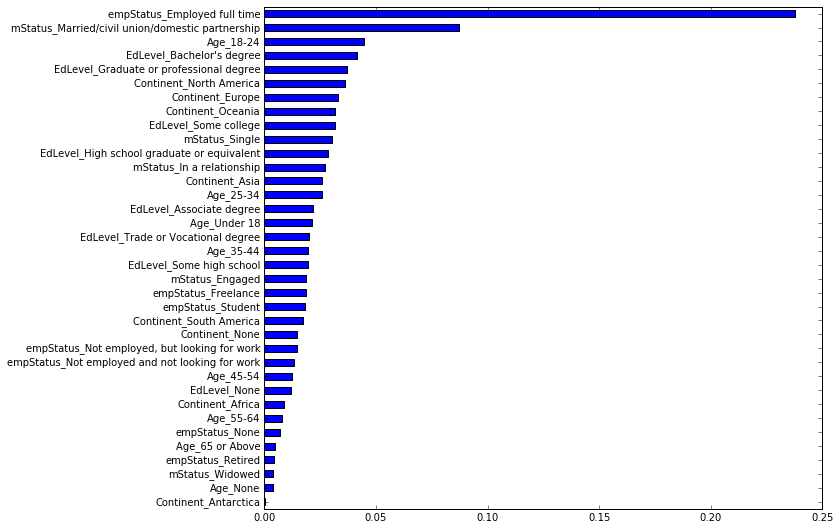

In [458]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,9));

C:\Users\Heather\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


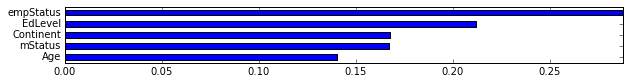

In [459]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

# n_estimators
    Trying out n_estimators

2000 trees
C-stat:  0.662424499845

3000 trees
C-stat:  0.662165734422

4000 trees
C-stat:  0.662132050049



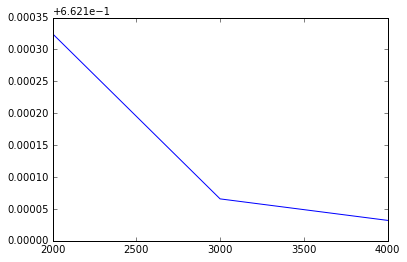

In [460]:
# Code from Jason Sanchez's Random Forest=Awesome
results = []
n_estimator_options = [2000, 3000, 4000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

### max_features

auto option
C-stat:  0.662424499845

None option
C-stat:  0.662424499845

sqrt option
C-stat:  0.662471142605

log2 option
C-stat:  0.662449855465

0.9 option
C-stat:  0.662441681507

0.2 option
C-stat:  0.662426517055



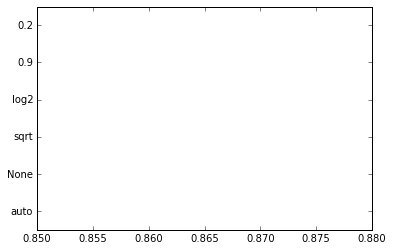

In [461]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=2000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

### n_samples_leaf

1 min samples
C-stat:  0.662424499845

2 min samples
C-stat:  0.66624553534

3 min samples
C-stat:  0.668669734957

4 min samples
C-stat:  0.6705813113

5 min samples
C-stat:  0.672295739409

6 min samples
C-stat:  0.673615862264

7 min samples
C-stat:  0.674736295911

8 min samples
C-stat:  0.67579498159

9 min samples
C-stat:  0.676549349705

10 min samples
C-stat:  0.677201121587



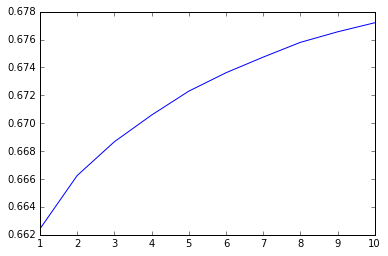

In [462]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=2000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

# Final Model

In [468]:
model = RandomForestRegressor(n_estimators=2000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=50)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.682604780234
